# Toxic Comments Quick EDA
Focused view: shapes, preview, class balance, and word clouds.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datasets import load_dataset
from sklearn.model_selection import train_test_split

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('Libraries loaded successfully')

Libraries loaded successfully


In [ ]:
dataset = load_dataset('AiresPucrs/toxic-comments')

train_ds = dataset['train']
df_train = train_ds.to_pandas()

split_used = None
if 'test' in dataset:
    split_used = 'test'
elif 'validation' in dataset:
    split_used = 'validation'

if split_used:
    df_test = dataset[split_used].to_pandas()
    print(f'Using `{split_used}` split as test set')
else:
    df_train, df_test = train_test_split(
        df_train,
        test_size=0.2,
        random_state=42,
        stratify=df_train['toxic'] if 'toxic' in df_train else None,
    )
    df_train = df_train.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    print('Dataset has only a train split; created 80/20 stratified train/test split')

print(f'Train shape: {df_train.shape}')
print(f'Test shape: {df_test.shape}')
print(f'\nColumns: {df_train.columns.tolist()}')

Dataset has only a train split; created 80/20 stratified train/test split
Train shape: (56125, 2)
Test shape: (14032, 2)

Columns: ['comment_text', 'toxic']


In [ ]:
display(df_train.head())

,comment_text,toxic
0,montreal ottawa east toronto toronto vancover ...,1
1,help desk question responses talk contributions,1
2,due respect hersfoldat certain due pointyour b...,0
3,site full shit somebody posts valid evidence e...,0
4,intention stop dick use template image worksho...,0


       count  percentage
toxic                   
0      28064        50.0
1      28061        50.0


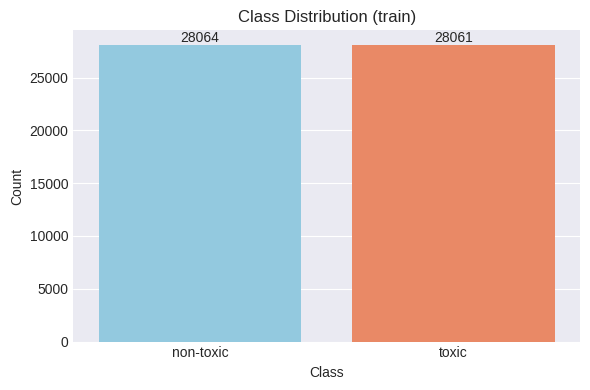

In [ ]:
class_counts = df_train['toxic'].value_counts().sort_index()
class_pct = (class_counts / class_counts.sum() * 100).round(2)
class_df = pd.DataFrame({'count': class_counts, 'percentage': class_pct})
print(class_df)

fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x=class_df.index.map({0:'non-toxic',1:'toxic'}), y=class_df['count'], ax=ax, palette=['skyblue','coral'])
ax.set_title('Class Distribution (train)')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%d')
plt.tight_layout()
plt.show()

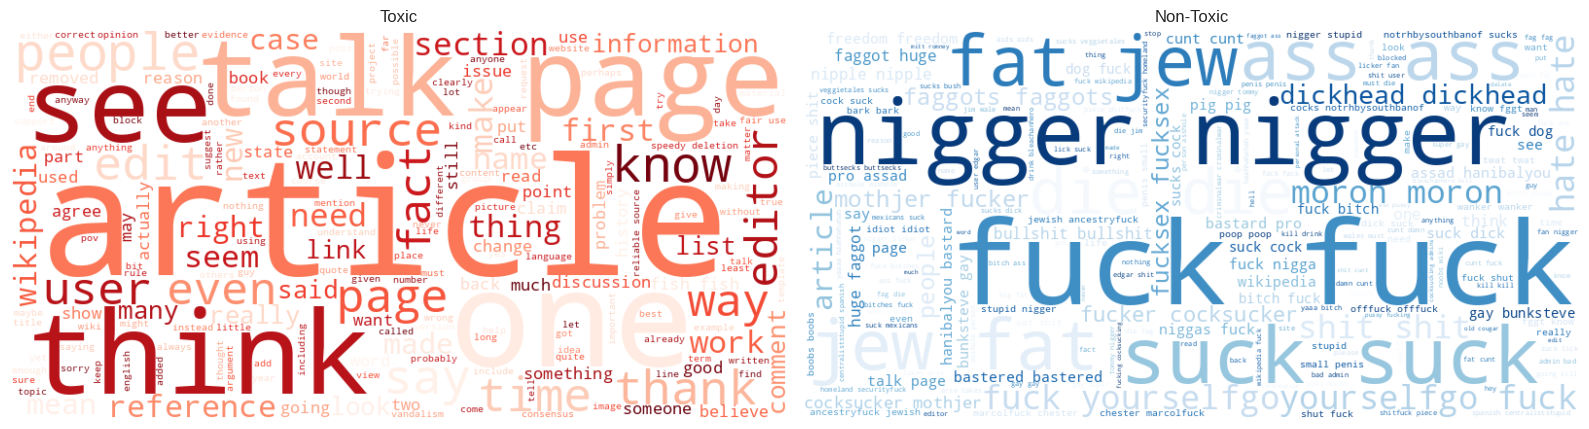

In [ ]:
def plot_wordcloud(text, title, ax, colormap):
    text = text.strip()
    if not text:
        ax.text(0.5, 0.5, f'No text available for {title}', ha='center', va='center')
        ax.axis('off')
        return
    wc = WordCloud(width=800, height=400, background_color='white', colormap=colormap, max_words=200).generate(text)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title)

toxic_text = ' '.join(df_train.loc[df_train['toxic'] == 1, 'comment_text'].astype(str))
non_toxic_text = ' '.join(df_train.loc[df_train['toxic'] == 0, 'comment_text'].astype(str))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_wordcloud(toxic_text, 'Toxic', axes[0], 'Reds')
plot_wordcloud(non_toxic_text, 'Non-Toxic', axes[1], 'Blues')
plt.tight_layout()
plt.show()